<a href="https://colab.research.google.com/github/thanhle3968/optimal_theory_pair_trading/blob/main/Probability_and_statistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Probability

## Random variable and Bayes formula

In [ ]:
#vd1: gieo một đồng xu cân đối đồng chất 10000 lần
import numpy as np
so_lan_tung =  10000
# random.randint(a,b) >>> Return a random integer N such that a <= N <= b
tung_dong_xu = np.random.randint(2, size = so_lan_tung) 
so_lan_0 = (tung_dong_xu == 0).sum()
so_lan_1 = (tung_dong_xu == 1).sum()
P_0 = so_lan_0/so_lan_tung
P_1 = so_lan_1/so_lan_tung
print('Xác suất tung đồng xu mặt 0', P_0)
print('Xác suất tung đồng xu mặt 1', P_1)

Xác suất tung đồng xu mặt 0 0.4961
Xác suất tung đồng xu mặt 1 0.5039


In [ ]:
#vd2 gieo một đồng xu bất cân đối 10000 lần
def tung_xu():
    if np.random.random() < 0.6: 
     return 0
    else: 
     return 1
ket_qua = np.zeros(so_lan_tung)
for i in range(so_lan_tung):
    ket_qua[i] = (tung_xu())
P_3 = (ket_qua == 0 ).sum()/so_lan_tung
P_4 = (ket_qua == 1).sum()/so_lan_tung
print('Xác suất tung đồng xu mặt 0  ', P_3)
print('Xác suất tung đồng xu mặt 1 ', P_4)

Xác suất tung đồng xu mặt 0   0.5934
Xác suất tung đồng xu mặt 1  0.4066


In [ ]:
#Hàm tính công thức Bayes. 
def bayes_theorem(p_a, p_b_given_a, p_b_given_not_a):
    #tính p_not_a
    p_not_a = 1 - p_a
    #tính p_b bằng công thức xs toàn phần
    p_b = p_b_given_a * p_a + p_b_given_not_a * p_not_a
    #tính P(a/b) bằng công thức bayes
    p_a_given_b = (p_b_given_a * p_a)/p_b
    return p_a_given_b

#p(a)
p_a = 0.999
p_b_given_a = 0.01
p_b_given_not_a = 0.98
#result
result = bayes_theorem(p_a, p_b_given_a, p_b_given_not_a)

print('P(A|B) = %.4f%%' % (result*100))
print('P(not A|B)= %.4f%%' % ((1-result)*100)) 

P(A|B) = 91.0665%
P(not A|B)= 8.9335%


## PMF/ CDF/ PDF


In [ ]:
!pip install vnstock

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from vnstock import *
# prepair data
A_stock_name = 'TCB'
stock_A = stock_historical_data(symbol=A_stock_name, start_date="2021-01-01", end_date='2023-04-11')['Close'].to_numpy()

B_stock_name = 'MBB'
stock_B = stock_historical_data(symbol=B_stock_name, start_date="2021-01-01", end_date='2023-04-11')['Close'].to_numpy()

In [ ]:
#compute percent change 
A_pct_change = (stock_A[1:]/stock_A[0:-1] - 1)*100
B_pct_change = (stock_B[1:]/stock_B[0:-1] - 1)*100

In [ ]:
A_pct_change[0:10]

array([ 0.15151515,  0.45385779,  4.21686747,  3.17919075, -1.2605042 ,
       -0.42553191,  0.14245014,  1.70697013,  3.07692308, -1.76390773])

**Giá trị trung bình**
$$
\bar{x} = \frac{x_1 + x_2 + ... + x_n}{n}
$$

In [ ]:
np.mean(A_pct_change)

0.014654892830343335

**Độ lệch chuẩn**
$$
\sigma = \sqrt{\frac{(x_1 - \bar{x})^{2} + (x_2 - \bar{x})^{2}+ ... + (x_n - \bar{x})^{2}}{n}}
$$

In [ ]:
np.std(A_pct_change)

2.4107357594664913

### Hàm trọng số- Probability mass function- PMF

Biến ngẫu nhiên rời rạc X có miền giá trị có thể nhận (x1, · · · , xn)
Hàm trọng số của biến ngẫu nhiên rời rạc ký hiệu là
pX (x) = P(X = x), ∀x ∈ R

Ý nghĩa: Hàm trọng số thể hiện khả năng xảy ra tại một điểm x.

In [ ]:
A_pct_change_round = np.round_(A_pct_change, 0)
A_pct_change_round[0:10]

array([ 0.,  0.,  4.,  3., -1., -0.,  0.,  2.,  3., -2.])

In [ ]:
#Hàm trọng số 
import numpy as np
A_pct_change_unique, tan_so = np.unique(A_pct_change_round,return_counts = True)
A_pct_change_unique
tan_so
pmf = tan_so/ len(A_pct_change_round)
#bang phan phoi xac suat
np.column_stack((A_pct_change_unique, pmf))

array([[-7.00000000e+00,  3.01418440e-02],
       [-6.00000000e+00,  3.54609929e-03],
       [-5.00000000e+00,  1.41843972e-02],
       [-4.00000000e+00,  2.12765957e-02],
       [-3.00000000e+00,  3.90070922e-02],
       [-2.00000000e+00,  6.73758865e-02],
       [-1.00000000e+00,  1.96808511e-01],
       [-0.00000000e+00,  2.51773050e-01],
       [ 1.00000000e+00,  1.68439716e-01],
       [ 2.00000000e+00,  9.21985816e-02],
       [ 3.00000000e+00,  4.96453901e-02],
       [ 4.00000000e+00,  2.65957447e-02],
       [ 5.00000000e+00,  1.24113475e-02],
       [ 6.00000000e+00,  1.24113475e-02],
       [ 7.00000000e+00,  1.41843972e-02]])

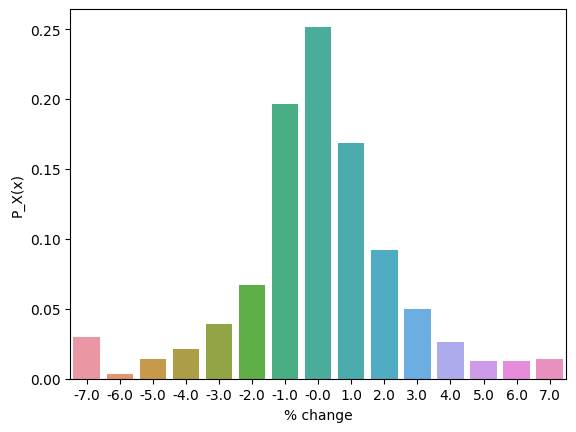

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats 
PMF = sns.barplot(x = A_pct_change_unique, y = pmf)
PMF.set(xlabel='% change', ylabel= 'P_X(x)')
plt.show()

### Hàm phân phối tích luỹ (Cumulative distribution function- CDF)

Hàm phân phối tích luỹ của biến ngẫu nhiên X là hàm được xác định
bởi công thức

Fx (x) = P(X ≤ x), ∀x ∈ R

Ý nghĩa: Hàm phân phối tích luỹ là xác suất của sự kiện bnn X nhận
giá trị từ −∞ tới x. Khi có hàm phân phối ta thực hiện với hàm giải
tích thay vì làm với các phép toán với sự kiện.

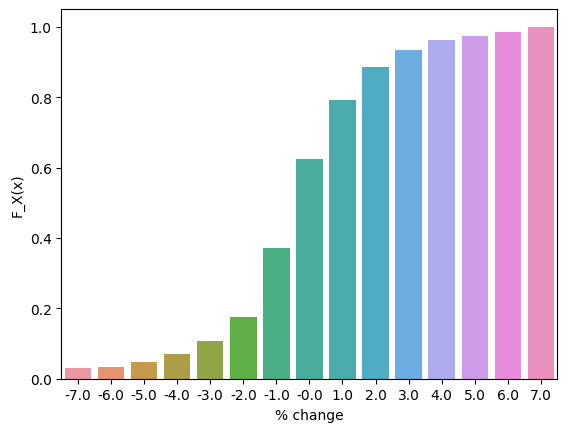

In [ ]:
#Hàm phân phối tích luỹ 
cdf = np.cumsum(pmf)
CDF = sns.barplot(x=A_pct_change_unique, y=cdf)

CDF.set(xlabel='% change',ylabel = 'F_X(x)')
plt.show()

In [ ]:
# Xac suat >=1
1-cdf[5]

0.824468085106383

In [ ]:
#Xac suat diem gioi >=6
1 - cdf[10]

0.06560283687943258

### Hàm mật độ (Density probability function- PDF)

X là biến ngẫu nhiên liên tục P(X = x) = 0∀x ∈ R.

Ta cần hàm số đo đo khả năng xảy ra tại lân cận một điểm

P(x ≤ X < x + ∆x) = FX (x + ∆x) − FX (x)

Ý nghĩa: Hàm mật độ tương tự như hàm trọng số

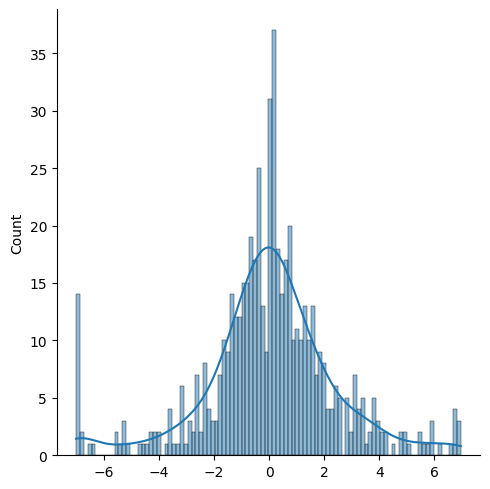

In [ ]:
#ham mat do
import seaborn as sns

sns.displot(A_pct_change, bins=100, kde=True)

### Gambler's Ruin Simulation

In [ ]:
# Mô phỏng đánh đề
# 1. play only once
def so_de_hom_nay():
  return np.random.randint(0, 100)
def return_money(bets, today_choice, so_de):
  if today_choice == so_de:
    return bets * 70
  else: 
    return 0

today_choice = 10
bets = 100000
so_de = so_de_hom_nay()
return_money(bets, today_choice, so_de)

0

In [ ]:
# 2. bet to death
n = 1000
reports = []
for i in range(n):
  # init 
  total_money = 10000000 #10tr
  target_money = 30000000 #15tr
  # start betting
  while (total_money > 0) and (total_money < target_money):
    today_choice = np.random.randint(0, 100) # you can make your own strategy
    bets = min(100000, total_money)
    so_de = so_de_hom_nay()
    total_money = total_money - bets + return_money(bets, today_choice, so_de)
  reports.append(total_money)


In [ ]:
np.unique(reports, return_counts=True)

(array([       0, 30000000, 30100000, 30200000, 30300000, 30500000,
        30600000, 30700000, 30800000, 31200000, 31300000, 31500000,
        31700000, 31900000, 32100000, 32200000, 32300000, 32600000,
        32800000, 32900000, 33000000, 33100000, 33300000, 33400000,
        33500000, 33600000, 33700000, 33800000, 34000000, 34300000,
        34400000, 34500000, 34800000, 34900000, 35400000, 35800000,
        35900000]),
 array([933,   1,   2,   3,   4,   2,   2,   3,   2,   3,   2,   1,   2,
          1,   1,   1,   3,   2,   2,   2,   3,   2,   1,   3,   2,   2,
          2,   2,   1,   3,   1,   1,   1,   1,   1,   1,   1]))

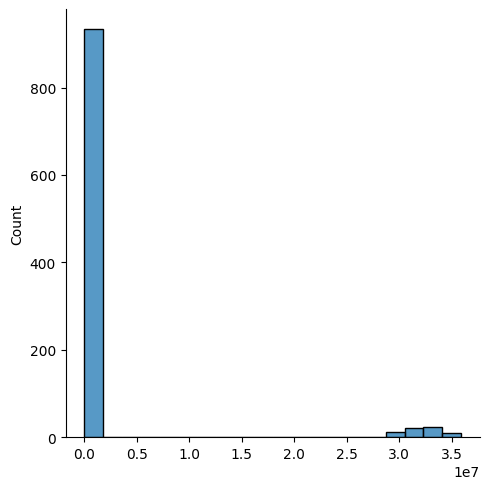

In [ ]:
sns.displot(reports, bins=20)

In [ ]:
# Bookmaker return:
10000000*n - np.sum(reports)

7830800000

## Some important probability distributions

**Scipy library**

- Create random variable with specific distribution function
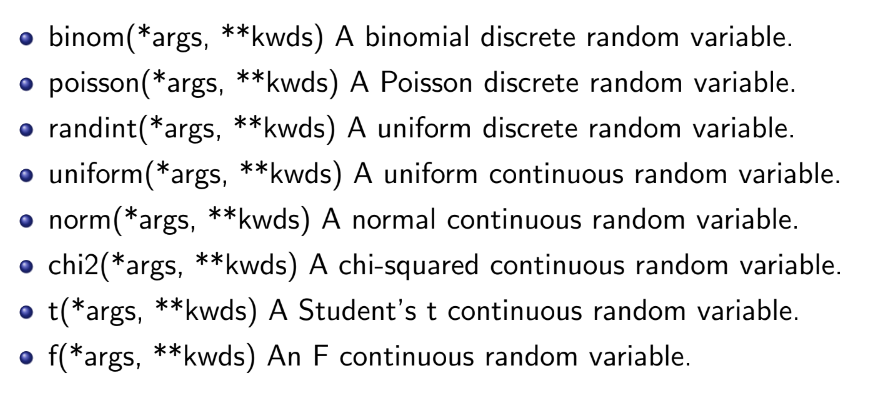

- Useful function

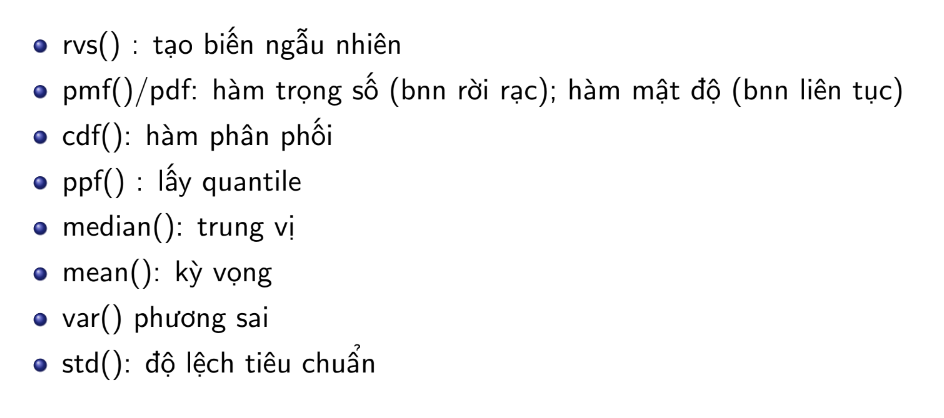

### Phân phối nhị thức

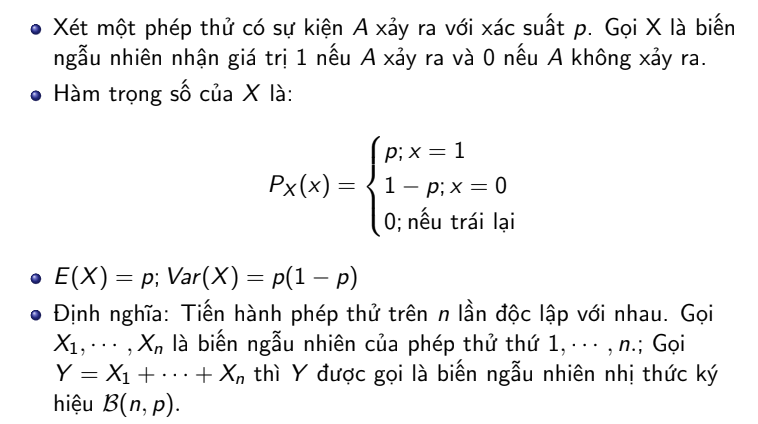

Bài tập

Một đề thi trắc nghiệm có 30 câu. Một người đi thi không biết gì
chọn ngẫu nhiên 1 trong 4 phương án cho mỗi câu. Tìm xác suất
người này được diểm qua nghĩa là trả lời được ít nhất 12 câu đúng.
Tìm kỳ vọng và độ lệch tiêu chuẩn cho số câu trả lời đúng.

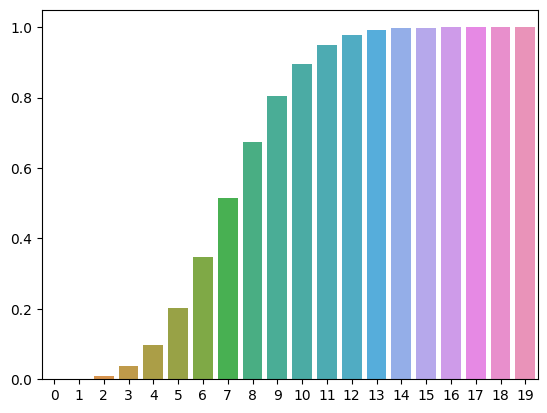

In [ ]:
from scipy.stats import binom
import numpy as np
import matplotlib.pyplot as plt

x= np.arange(0,20,1)
cdf = binom(30, 0.25).cdf(x)
sns.barplot(x=x, y=cdf)
plt.show()

In [ ]:
import matplotlib.pyplot as plt
#Tính phân phối nhị thức
from scipy import stats
X = stats.binom(30,0.25) #Khai báo biến nhị thức

In [ ]:
#Xác suất số lượng câu >=12
1- X.cdf(11)

0.050658280051551596

In [ ]:
#Kỳ vọng
X.mean()

7.5

In [ ]:
#Độ lệch tiêu chuẩn
X.std()

2.3717082451262845

### Phân phối chuẩn

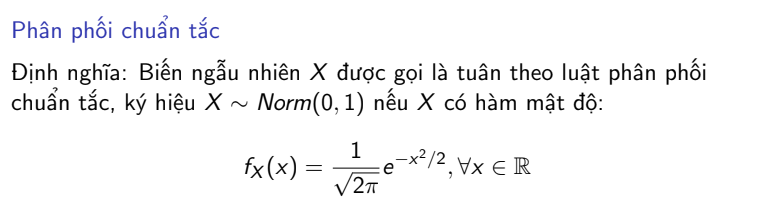

Bài tập

Giả sử chiều cao của nam thanh niên ở nước A
tuân theo luật phân phối chuẩn với kỳ vọng
164cm với độ lệch tiêu chuẩn 8cm. Chọn ngẫu
nhiên một nam sinh viên. Tìm xác suất sinh
viên này: 

Có chiều cao cao hơn 180cm

Tìm chiều cao mà xác suất để chiều cao thanh
niên nhỏ hơn con số này là 90%.

In [ ]:
from scipy.stats import norm

In [ ]:
mu=164; sigma =8

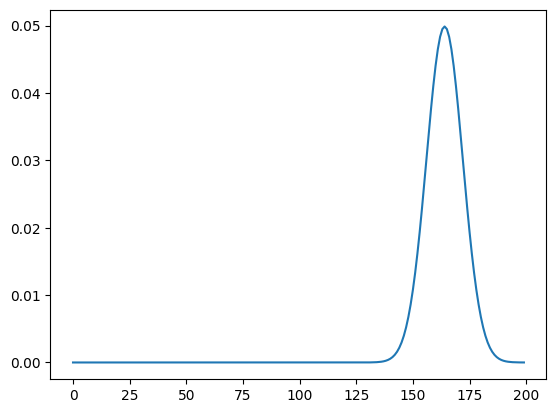

In [ ]:
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt

x= np.arange(0,200,1)
plt.plot(x, norm(164, 8).pdf(x))
plt.show()

In [ ]:
#Có chiều cao cao hơn 180cm
1-norm.cdf((180-mu)/sigma)


0.02275013194817921

In [ ]:
#tính chiều cao mà xs để chiều cao thanh niên nhỏ hơn con số này là 90%
norm.ppf(0.9,mu,sigma)

174.2524125243568

In [ ]:
norm.pdf(1)

0.24197072451914337

In [ ]:
X.pmf(2)

0.008631467691550715

In [ ]:
X.pmf(3)

0.026853455040379975

### Phân phối Poison

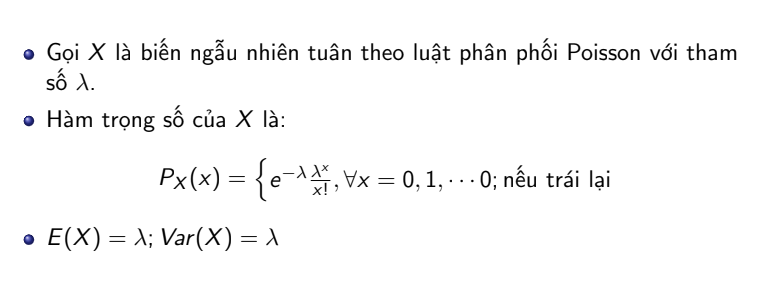

Bài tập

Số lượng khách hàng tới một cửa hàng giả sử tuân theo biến ngẫu
nhiên có phân phối Poisson với tham số λ = 3 khách một giờ.

Tìm xác suất trong một giờ có ít nhất 1 khách đến cửa hàng?

Tìm xác suất số lượng khách hàng tới siêu thị ít hơn 6 và hơn 1 khách hàng?

Câu hỏi về nhà:

Tìm xác suất trong 8 tiếng có 20 khách tới cửa hàng?

Tìm kỳ vọng, phương sai của Y ?

In [ ]:
a = stats.poisson(3)

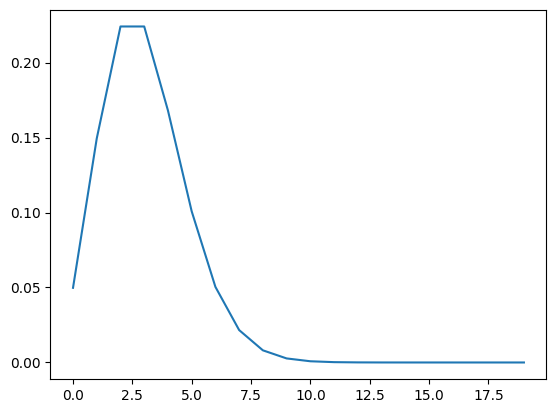

In [ ]:
from scipy.stats import poisson
import numpy as np
import matplotlib.pyplot as plt

x= np.arange(0,20,1)
plt.plot(x, poisson(3).pmf(x))
plt.show()

In [ ]:
#Khai báo biến ngẫu nhiên X có phân phối Poison tham số lamda=3
X= stats.poisson(3)
#Kì vọng số khách tới cửa hàng
X.mean()

3.0

In [ ]:
#Phương sai số khách hàng tới cửa hàng 
X.var()

3.0

In [ ]:
#Xs có ít nhất một khách hàng tới cửa hàng
1- X.pmf(0)

0.950212931632136

In [ ]:
#Có từ 2 đến 5 khách hàng tới siêu thị
X.cdf(5) - X.cdf(1)

0.7169337844972408

# Statistics

## Basic stats

In [ ]:
from scipy import stats

In [ ]:
data_samples = A_pct_change

In [ ]:
print('min:',np.min(data_samples))
print('max:', np.max(data_samples))
print('mean:', np.mean(data_samples))
print('std:', np.std(data_samples))
print('mode:', stats.mode(data_samples))

min: -6.996587030716728
max: 6.956521739130439
mean: 0.014654892830343335
std: 2.4107357594664913
mode: ModeResult(mode=array([0.]), count=array([30]))


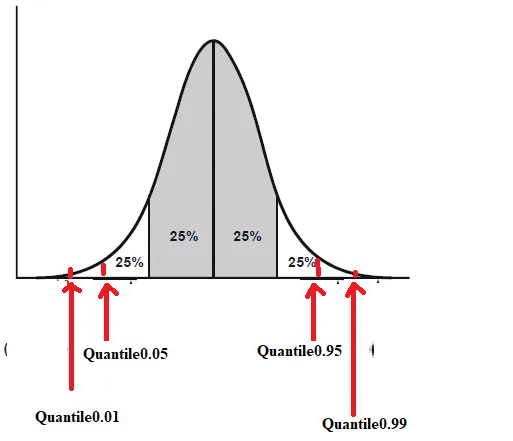

In [ ]:
print('0.05 quantile:', np.quantile(data_samples, 0.05))
print('0.10 quantile:', np.quantile(data_samples, 0.10))
print('0.15 quantile:', np.quantile(data_samples, 0.15))
print('0.20 quantile:', np.quantile(data_samples, 0.20))
print('0.25 quantile:', np.quantile(data_samples, 0.25))
print('0.30 quantile:', np.quantile(data_samples, 0.30))
print('0.35 quantile:', np.quantile(data_samples, 0.35))
print('0.40 quantile:', np.quantile(data_samples, 0.40))
print('0.45 quantile:', np.quantile(data_samples, 0.45))
print('0.50 quantile:', np.quantile(data_samples, 0.50))
print('0.55 quantile:', np.quantile(data_samples, 0.55))
print('0.60 quantile:', np.quantile(data_samples, 0.60))
print('0.65 quantile:', np.quantile(data_samples, 0.65))
print('0.70 quantile:', np.quantile(data_samples, 0.70))
print('0.75 quantile:', np.quantile(data_samples, 0.75))
print('0.80 quantile:', np.quantile(data_samples, 0.80))
print('0.85 quantile:', np.quantile(data_samples, 0.85))
print('0.90 quantile:', np.quantile(data_samples, 0.90))
print('0.95 quantile:', np.quantile(data_samples, 0.95))

0.05 quantile: -4.2975034674063775
0.10 quantile: -2.5894627021387584
0.15 quantile: -1.7352411673995294
0.20 quantile: -1.3343511450381684
0.25 quantile: -1.073841698841696
0.30 quantile: -0.7595937900232552
0.35 quantile: -0.5649186525636074
0.40 quantile: -0.38447563996697237
0.45 quantile: -0.10186420939872265
0.50 quantile: 0.0
0.55 quantile: 0.19671503488389974
0.60 quantile: 0.3845168915591435
0.65 quantile: 0.60606060606061
0.70 quantile: 0.8205206530224248
0.75 quantile: 1.1605430352433443
0.80 quantile: 1.5388430449739416
0.85 quantile: 1.957805108036005
0.90 quantile: 2.8715313463514898
0.95 quantile: 3.9493198771391076


**Covariance**
$$
\begin{array}{l}\rho (X,Y)= E\frac{(X-\mu _{x})(Y-\mu _{y})}{\sigma x.\sigma y}\end{array}
$$

In [ ]:
np.corrcoef(stock_A, stock_B)

array([[1.        , 0.81479829],
       [0.81479829, 1.        ]])

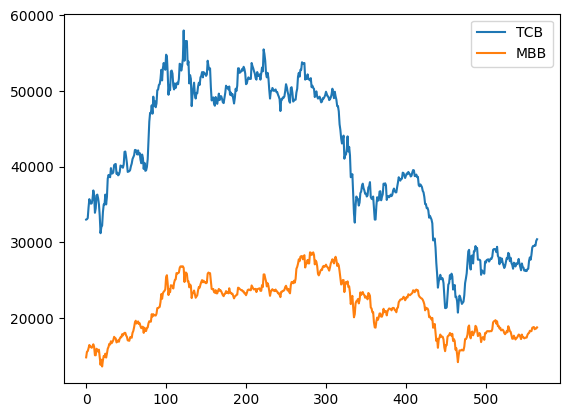

In [ ]:
plt.plot(stock_A)
plt.plot(stock_B)
plt.legend([A_stock_name, B_stock_name])
plt.show()


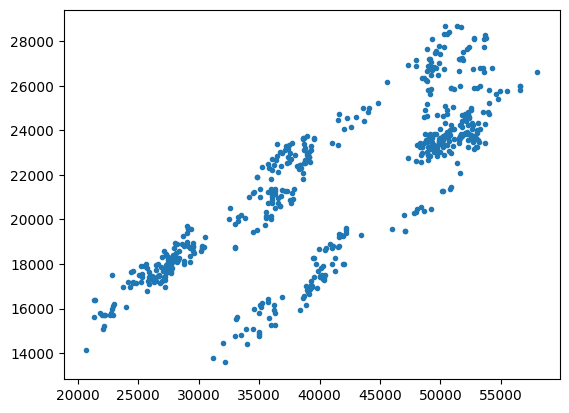

In [ ]:
import matplotlib.pyplot as plt 
plt.plot(stock_A, stock_B, '.')

### ESTIMATION

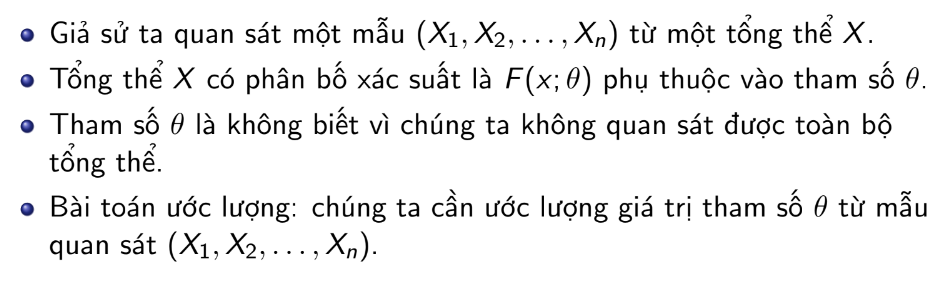

### Distfit

In [ ]:
!pip install distfit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from distfit import distfit
import numpy as np
# Initialize model and specify distribution to be normal
X = B_pct_change

In [ ]:
dfit = distfit()
dfit.fit_transform(X)
print(dfit.model)

[distfit] >INFO> fit
[distfit] >INFO> transform
[distfit] >INFO> [norm      ] [0.00 sec] [RSS: 0.0476381] [loc=0.070 scale=2.369]
[distfit] >INFO> [expon     ] [0.00 sec] [RSS: 0.227294] [loc=-6.958 scale=7.028]
[distfit] >INFO> [pareto    ] [0.00 sec] [RSS: 0.227294] [loc=-536870918.958 scale=536870912.000]
[distfit] >INFO> [dweibull  ] [0.10 sec] [RSS: 0.0176367] [loc=0.000 scale=1.579]
[distfit] >INFO> [t         ] [0.07 sec] [RSS: 0.0169649] [loc=0.122 scale=1.480]
[distfit] >INFO> [genextreme] [0.23 sec] [RSS: 0.0580203] [loc=-0.771 scale=2.494]
[distfit] >INFO> [gamma     ] [0.09 sec] [RSS: 0.050268] [loc=-44.596 scale=0.130]
[distfit] >INFO> [lognorm   ] [0.16 sec] [RSS: 0.0477405] [loc=-398.490 scale=398.565]
[distfit] >INFO> [beta      ] [0.13 sec] [RSS: 0.047123] [loc=-701.253 scale=734.296]
[distfit] >INFO> [uniform   ] [0.00 sec] [RSS: 0.168936] [loc=-6.958 scale=13.880]
[distfit] >INFO> [loggamma  ] [0.08 sec] [RSS: 0.0468659] [loc=-49.564 scale=13.972]
[distfit] >INFO> Co

{'name': 't', 'score': 0.016964864552944766, 'loc': 0.12248323522623492, 'scale': 1.479681800589212, 'arg': (2.6300999644695624,), 'params': (2.6300999644695624, 0.12248323522623492, 1.479681800589212), 'model': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7f14790fa340>, 'bootstrap_score': 0, 'bootstrap_pass': None, 'color': '#e41a1c', 'CII_min_alpha': -3.5687684828629522, 'CII_max_alpha': 3.8137349533154206}


The distfit library uses the goodness of fit test to determine the best probability distribution to the non-censored data. It works by comparing the **observed frequency (f)** to the **expected frequency** from the model **(f-hat)**, and computing the residual sum of squares (RSS)
$$RSS = \sum (y - \hat{y})^2$$

[distfit] >INFO> Create PDF plot for the parametric method.
[distfit] >INFO> Estimated distribution: T(loc:0.122483, scale:1.479682)
[distfit] >INFO> Create CDF plot for the parametric method.
[distfit] >INFO> Ploting CDF


(None,
 <Axes: title={'center': '\nt(df=2.6301, loc=0.122483, scale=1.47968)'}, xlabel='Values', ylabel='Frequency'>)

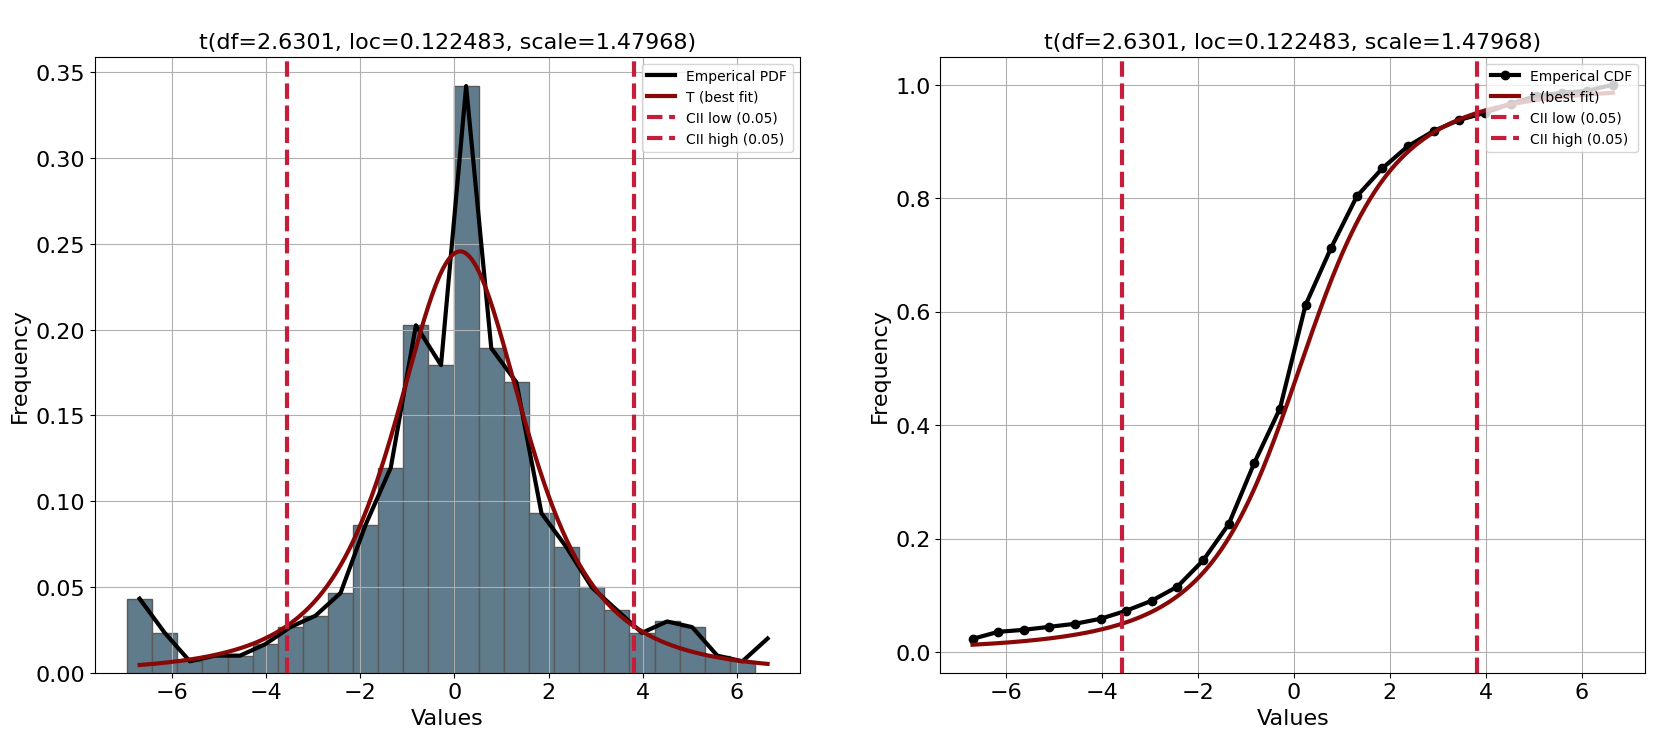

In [ ]:
# Make plot
fig, ax = plt.subplots(1,2, figsize=(20, 8))
dfit.plot(chart='PDF', ax=ax[0])
dfit.plot(chart='CDF', ax=ax[1])

[distfit] >INFO> Ploting Summary.


(<Figure size 2000x1000 with 1 Axes>,
 <Axes: title={'center': 'T (best fit)'}, xlabel='Probability Density Function (PDF)', ylabel='RSS (goodness of fit test)'>)

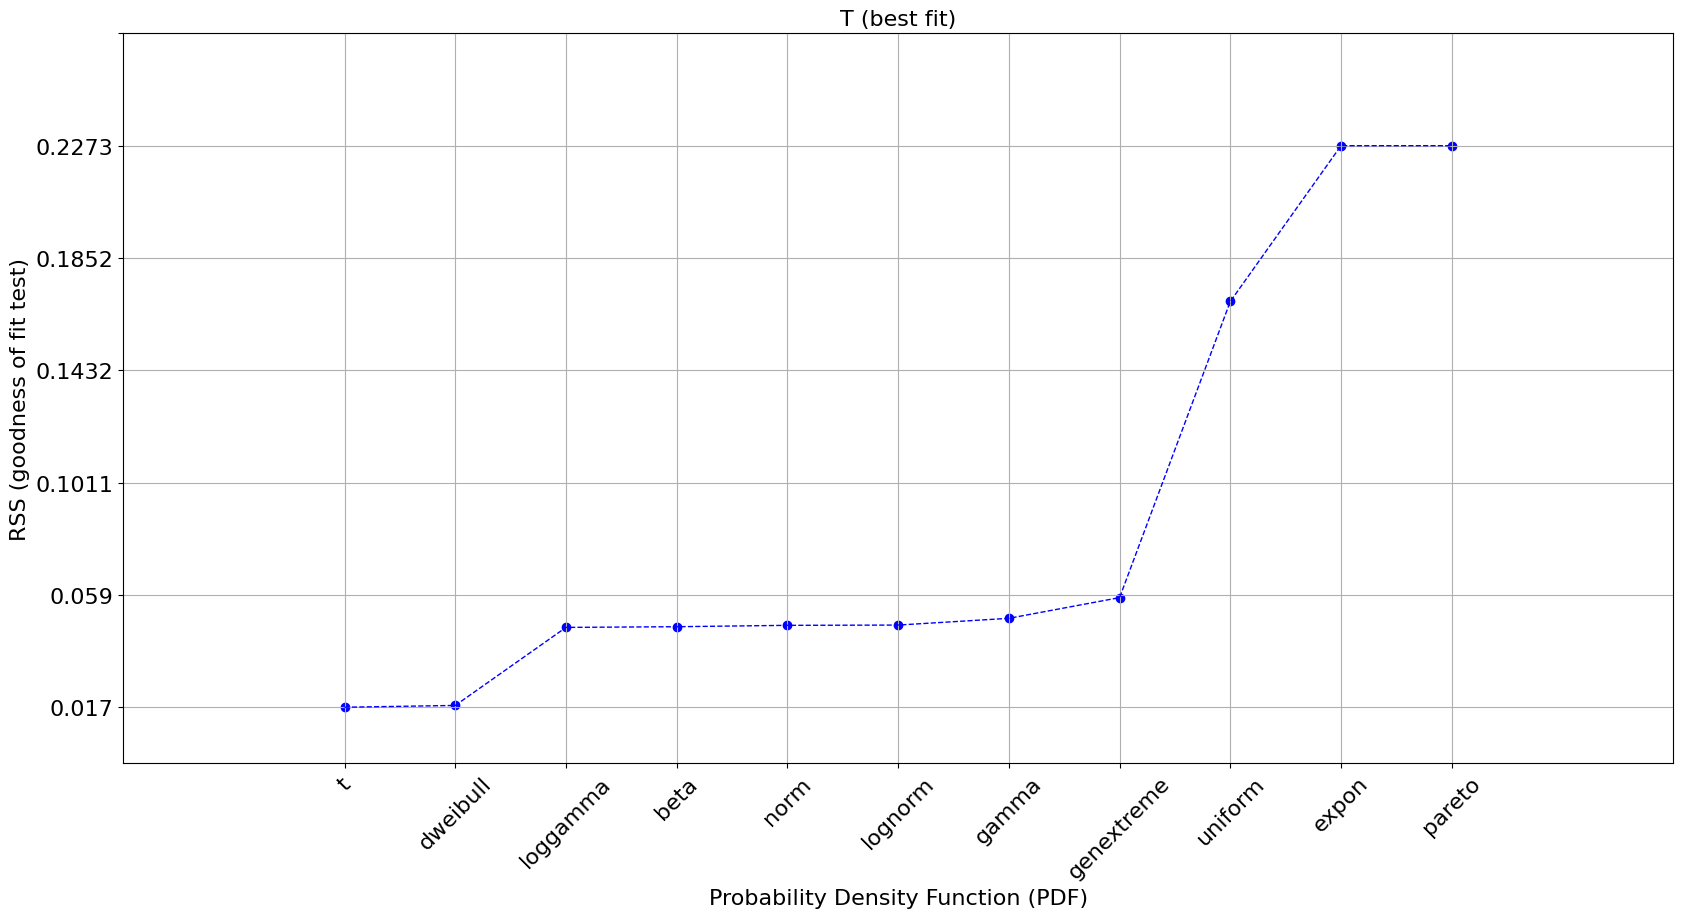

In [ ]:
dfit.plot_summary()

## Hypothesis testing

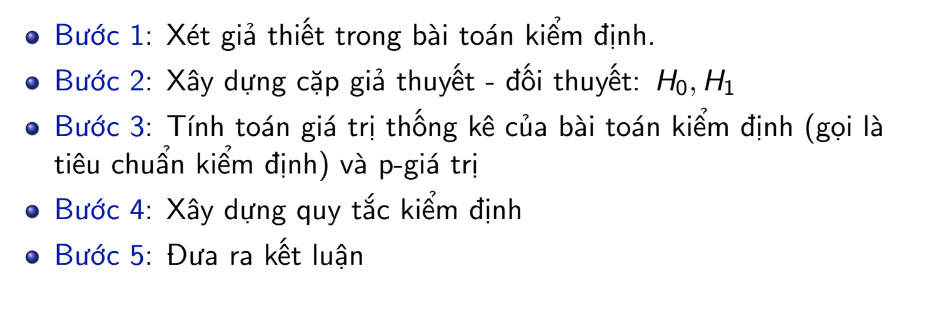

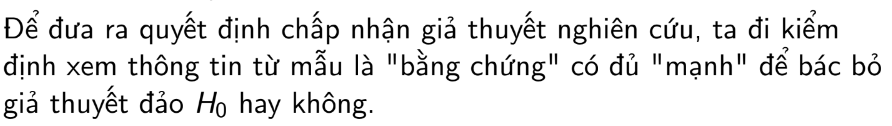

`Nói cách khác, nếu H0 là đúng, thì có khoảng p% khả năng thu được kết quả kiểm định hoặc kết quả tương tự.`

In [ ]:
# test conintegration
# https://www.statsmodels.org/dev/generated/statsmodels.tsa.stattools.coint.html#statsmodels.tsa.stattools.coint
from statsmodels.tsa.stattools import coint
score, p_value, _ = coint(stock_A, stock_B)
if p_value < 0.05:
    print("Hai chuỗi thời gian x và y là tích hợp cointegration với p-value = {}.".format(p_value))
else:
    print("Hai chuỗi thời gian x và y không tích hợp cointegration với p-value = {}.".format(p_value))

Hai chuỗi thời gian x và y không tích hợp cointegration với p-value = 0.750472923455251.
